In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [90]:
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")



In [91]:
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")


In [92]:
mean_age = train_data['Age'].mean()

train_data['Age'] = train_data['Age'].fillna(mean_age)

test_data['Age'] = test_data['Age'].fillna(mean_age)

train_data = train_data.drop(['PassengerId', 'Name'],axis = 1)

test_data = test_data.drop(['PassengerId', 'Name'], axis=1)

mode_avg = train_data['HomePlanet'].mode()[0]

train_data['HomePlanet'] = train_data['HomePlanet'].fillna(mode_avg)

train_data['HomePlanet'] = train_data['HomePlanet'].astype('category')


#train_data['HomePlanet'].isna().sum()
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(mode_avg)
test_data['HomePlanet'] = test_data['HomePlanet'].astype('category')



In [93]:
# Convert data type to boolean
train_data['CryoSleep'] = train_data['CryoSleep'].astype(bool)
test_data['CryoSleep'] = test_data['CryoSleep'].astype(bool)

# Step 1: Identify rows where passengers are in cryogenic sleep
cryo_sleep_rows = train_data[train_data['CryoSleep']]
cryo_sleep_rows2 = test_data[test_data['CryoSleep']]

# Step 2: Check for non-zero values in amenity-related columns
amenities_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
erroneous_rows = cryo_sleep_rows[(cryo_sleep_rows[amenities_columns] > 0).any(axis=1)]
erroneous_rows2 = cryo_sleep_rows2[(cryo_sleep_rows2[amenities_columns] > 0).any(axis=1)]

# Step 3: Assess and handle erroneous cases
if not erroneous_rows.empty:
    print("Erroneous values found in CryoSleep column. Erroneous rows:")
    #print(erroneous_rows)
    # Depending on the assessment, you can choose to remove or correct the erroneous rows
    # For example, to remove erroneous rows:
    train_data = train_data.drop(erroneous_rows.index)
    print("Erroneous rows removed.")
else:
    print("No erroneous values found in CryoSleep column.")

# Check for erroneous values
erroneous_values = train_data[train_data['CryoSleep'] & (train_data['RoomService'] > 0) | 
                      train_data['CryoSleep'] & (train_data['FoodCourt'] > 0) | 
                      train_data['CryoSleep'] & (train_data['ShoppingMall'] > 0) | 
                      train_data['CryoSleep'] & (train_data['Spa'] > 0) | 
                      train_data['CryoSleep'] & (train_data['VRDeck'] > 0)]
print("Erroneous values in CryoSleep column:", len(erroneous_values))



Erroneous values found in CryoSleep column. Erroneous rows:
Erroneous rows removed.
Erroneous values in CryoSleep column: 0


In [94]:
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
train_data[['CabinLevel', 'CabinSection','Cabinn']] = train_data['Cabin'].str.split('/', expand=True)
train_data = train_data.drop(['Cabin'],axis = 1)
mode_section = train_data['CabinSection'].mode()[0]
train_data['CabinSection'] = train_data['CabinSection'].fillna(mode_section)
mode_cabin = train_data['Cabinn'].mode()[0]
train_data['Cabinn'] = train_data['Cabinn'].fillna(mode_cabin)

In [97]:

test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')
test_data[['CabinLevel', 'CabinSection','Cabinn']] = test_data['Cabin'].str.split('/', expand=True)
test_data = test_data.drop(['Cabin'],axis = 1)
mode_section = test_data['CabinSection'].mode()[0]
test_data['CabinSection'] = test_data['CabinSection'].fillna(mode_section)
mode_cabin = test_data['Cabinn'].mode()[0]
test_data['Cabinn'] = test_data['Cabinn'].fillna(mode_cabin)


Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'CabinLevel', 'CabinSection', 'Cabinn'],
      dtype='object')


In [119]:
print(train_data.columns)
train_data['Destination']
test_data.isna().sum().sum()

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'CabinLevel', 'CabinSection', 'Cabinn'],
      dtype='object')


0

In [117]:
# Numerical features: Filling missing values with mean
numerical_features = ['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in numerical_features:
    train_data[feature] = train_data[feature].fillna(train_data[feature].mean())
    test_data[feature] = test_data[feature].fillna(test_data[feature].mean())
# Categorical feature: Filling missing values with mode
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
test_data['Destination'] = test_data['Destination'].fillna(test_data['Destination'].mode()[0])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


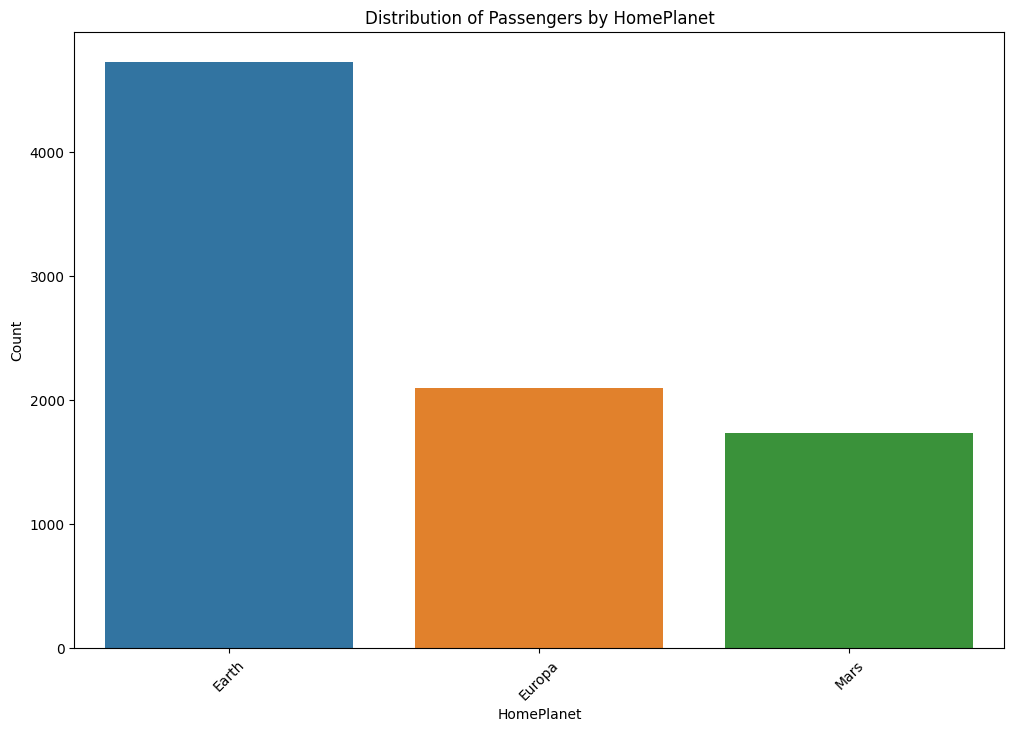

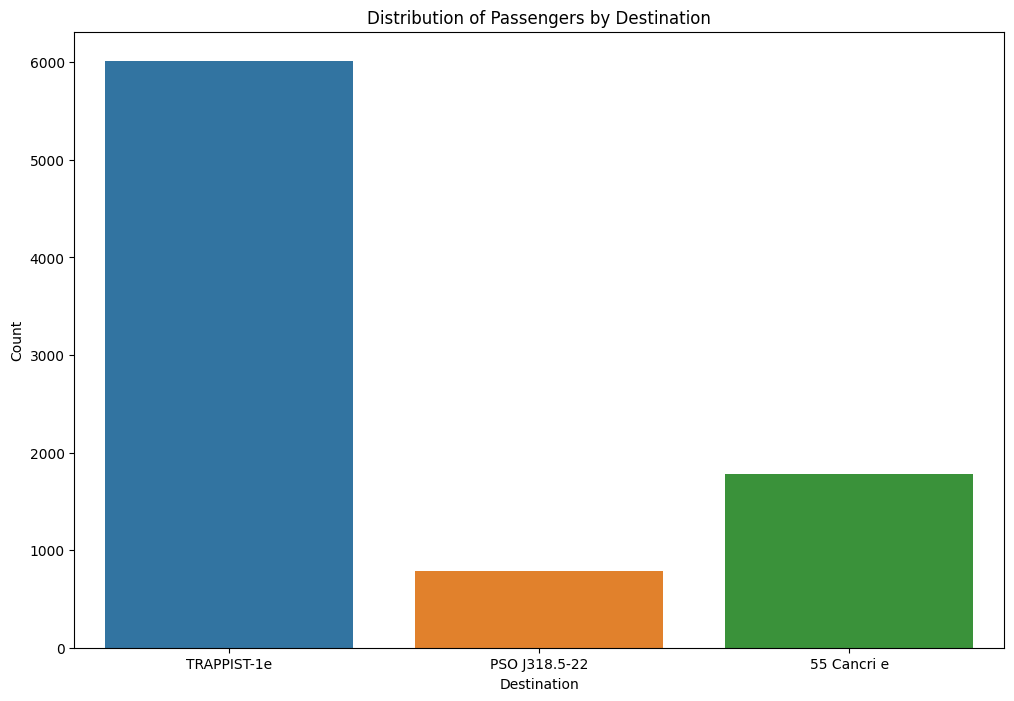

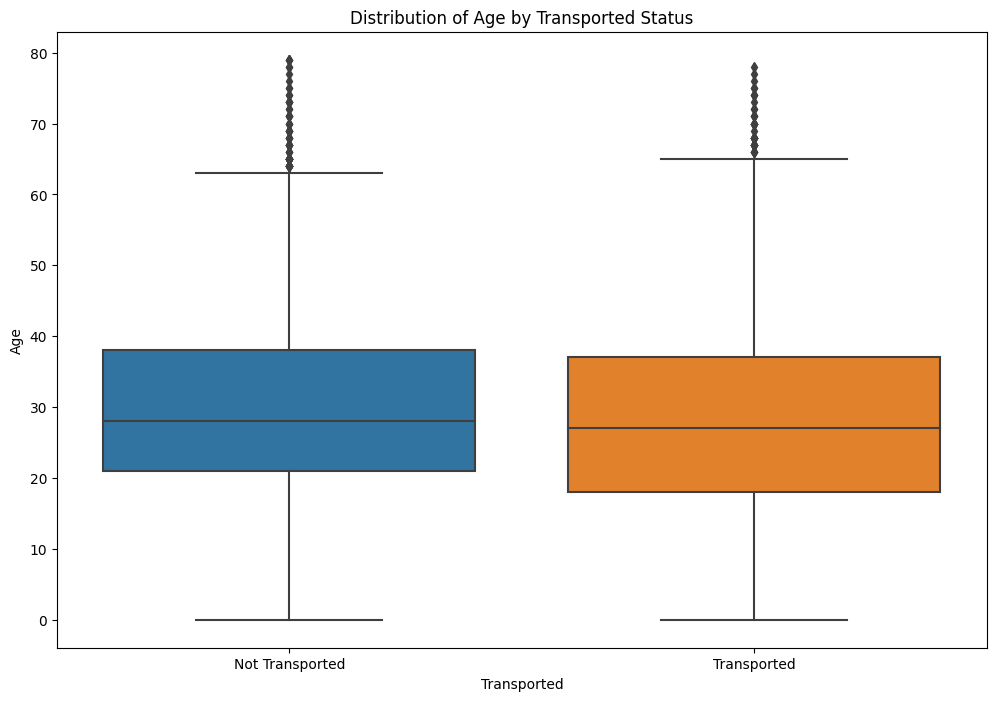

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assume 'df' contains the dataset

# Distribution of features
plt.figure(figsize=(12, 8))
sns.countplot(x='HomePlanet', data=train_data)
plt.title('Distribution of Passengers by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Destination', data=train_data)
plt.title('Distribution of Passengers by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Patterns and correlations
plt.figure(figsize=(12, 8))
sns.boxplot(x='Transported', y='Age', data=train_data)
plt.title('Distribution of Age by Transported Status')
plt.xlabel('Transported')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Transported', 'Transported'])
plt.show()



# Additional visualizations as needed


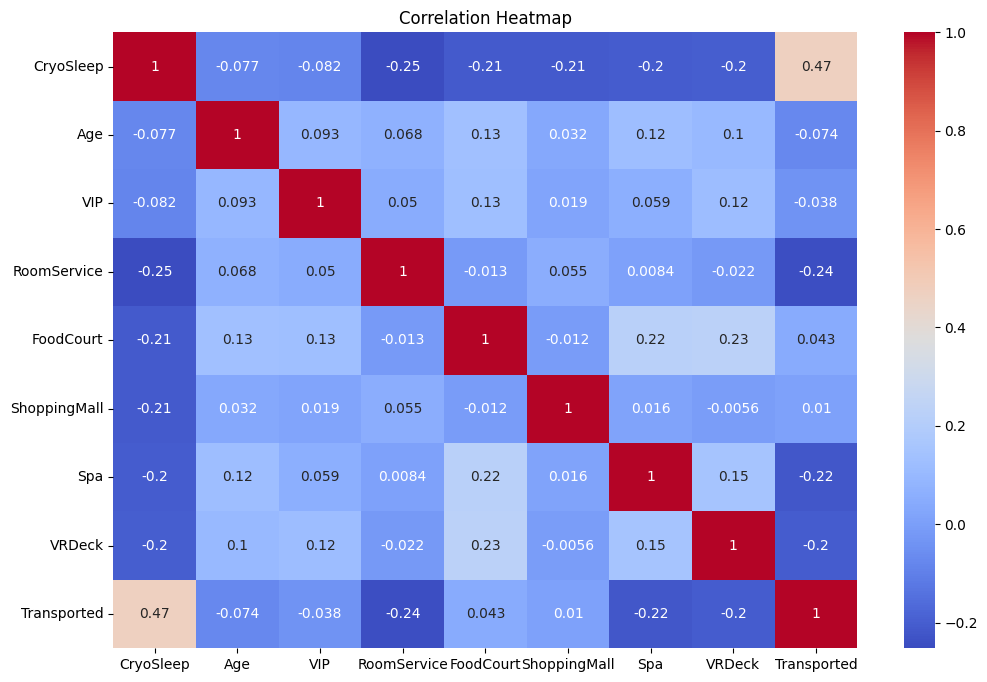

In [126]:
non_numeric_columns = ['HomePlanet', 'Destination', 'Cabinn', 'CabinSection', 'CabinLevel']

# Drop non-numeric columns for correlation calculation
numeric_df = train_data.drop(columns=non_numeric_columns)

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


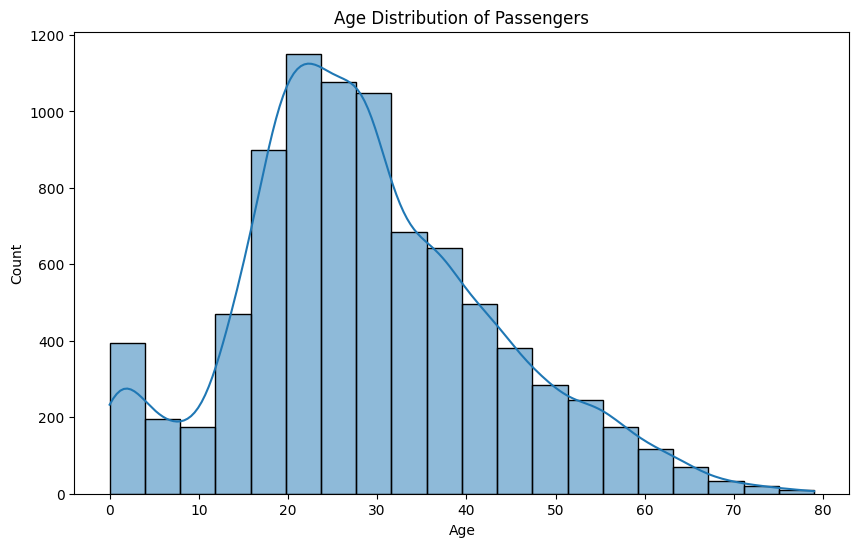

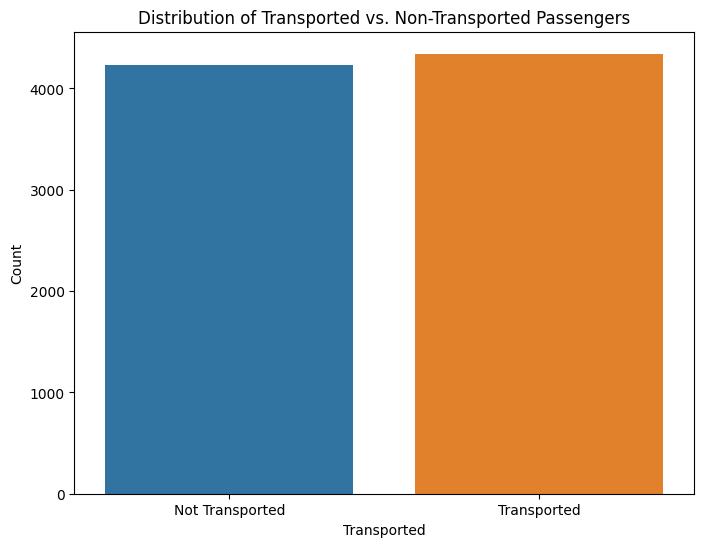

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Transportation status distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Transported', data=train_data)
plt.title('Distribution of Transported vs. Non-Transported Passengers')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Transported', 'Transported'])
plt.show()


Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'CabinLevel', 'CabinSection', 'Cabinn'],
      dtype='object')